In [1]:
graphplot <- function(title, x, y, color) {
  plot(x, y, type = "l", col = color)
  title(main=title, cex.main=3, font.main=1)
}

In [2]:
quantilplot <- function(title, x, pdf, cdf, p, quantiles) {
    options(repr.plot.width=20, repr.plot.height=10)
    par(mar=c(1,1,1,1))
    layout(matrix(c(1, 2, 3, 1, 4, 4), nrow=3, ncol = 2), heights=c(1,3,3))
    plot.new()
    text(0.5,0.5,title,cex=4)
    
    par(mar=c(3,3,4,2))
    graphplot("Dichtefunktion", x, pdf, "blue")
    graphplot("Verteilungsfunktion", x, cdf, "red")
    graphplot("Quantilplot", p, quantiles, "green")
}

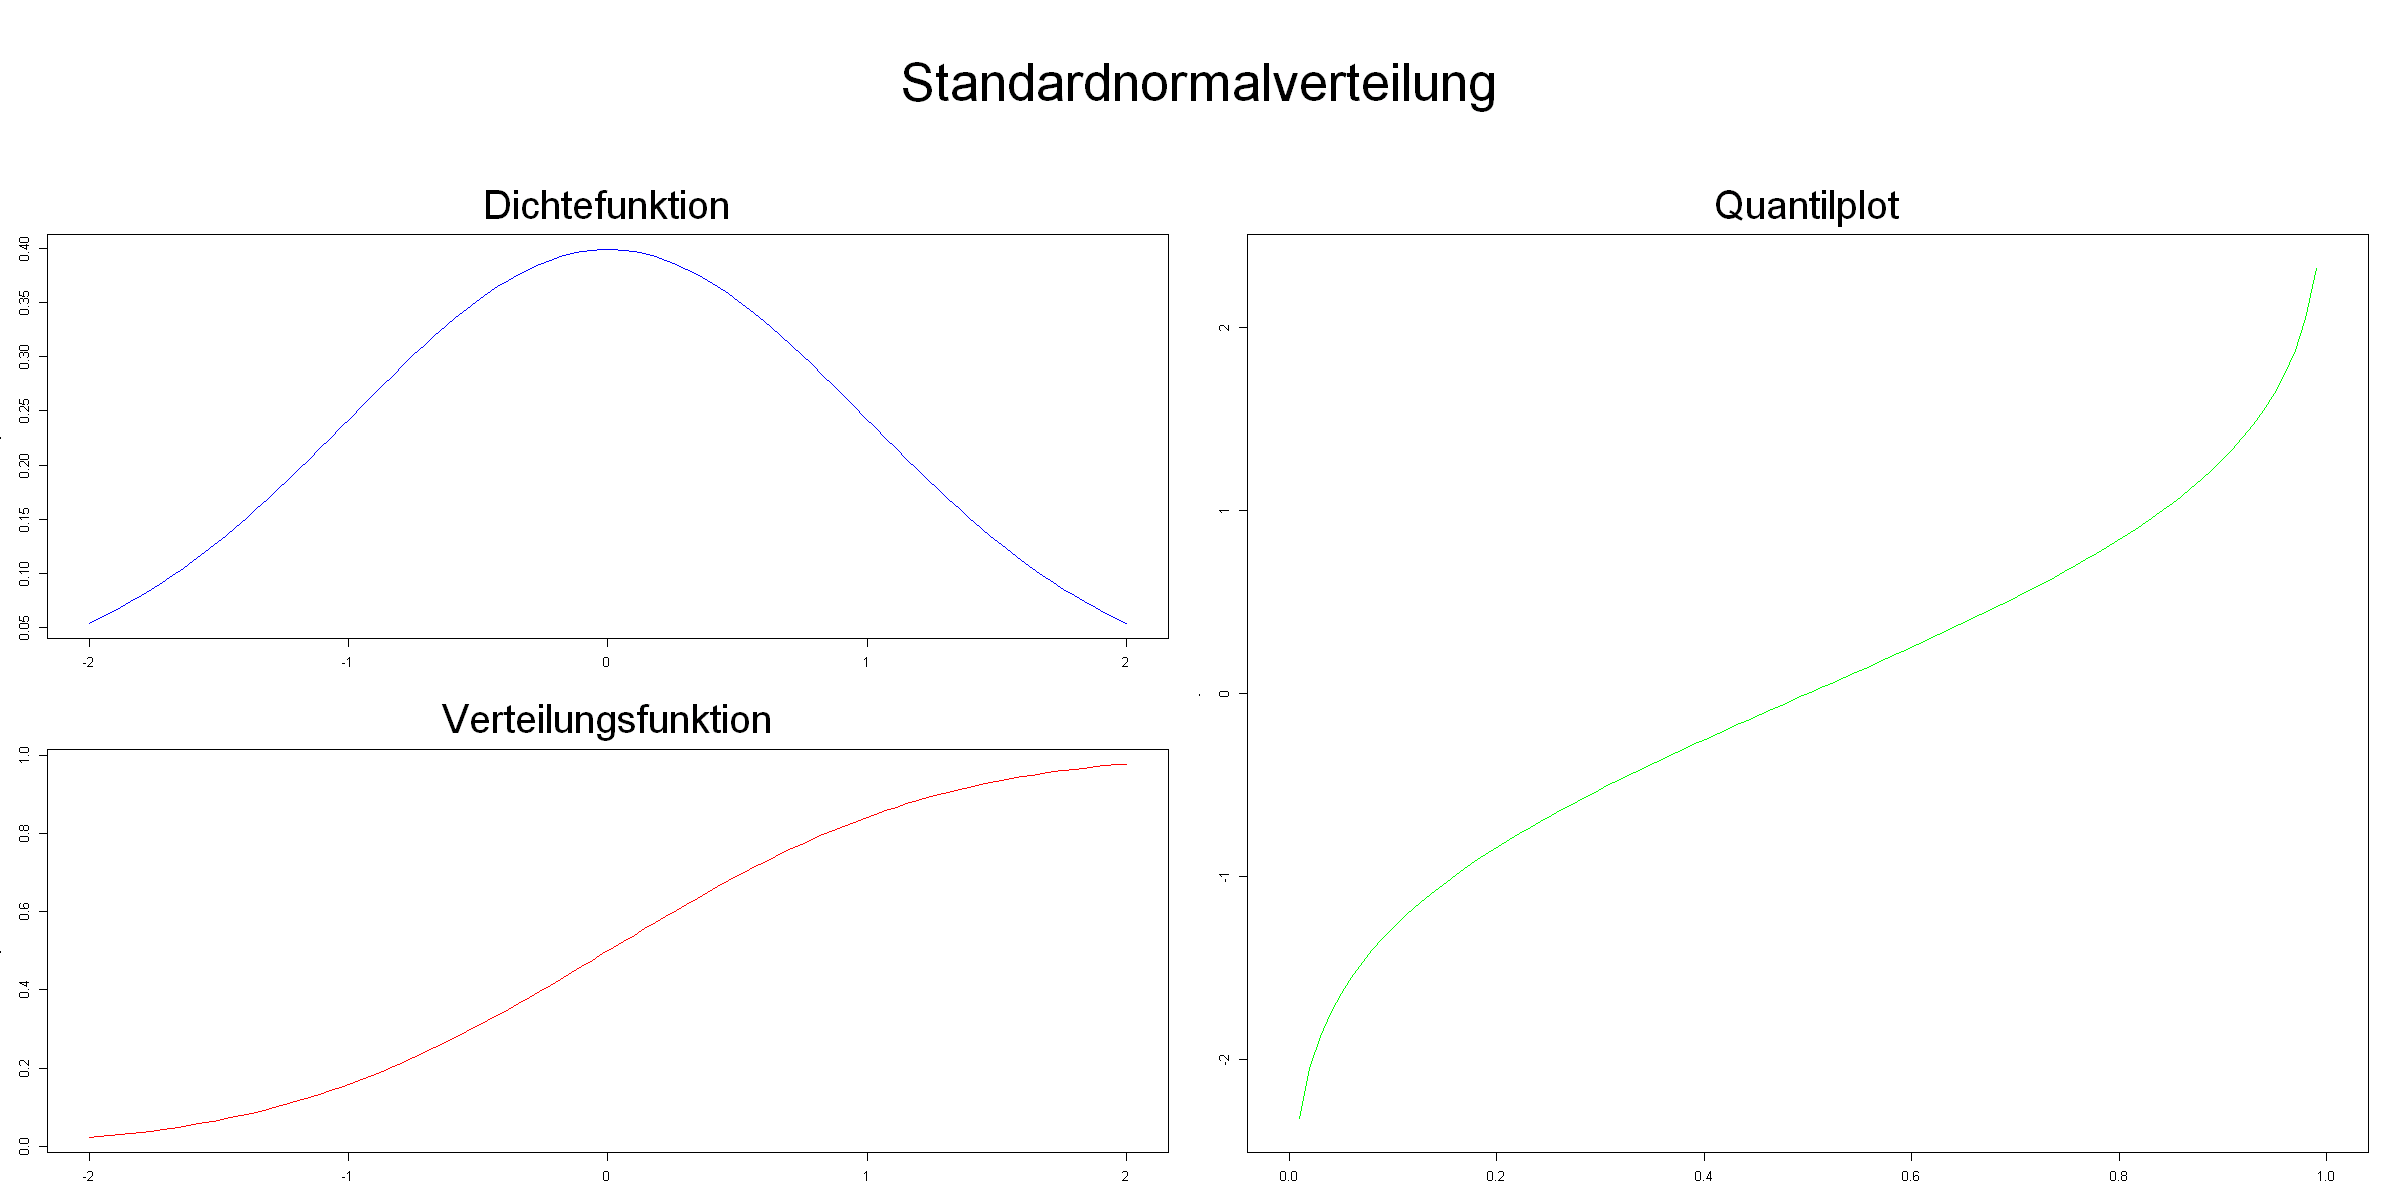

In [3]:
x <- seq(-3, 3, length=100)
pdf <- dnorm(x)
cdf <- pnorm(x)

p <- seq(0, 1, length=100)
quantiles <- qnorm(p)

value <- quantilplot("Standardnormalverteilung", x, pdf, cdf, p, quantiles)

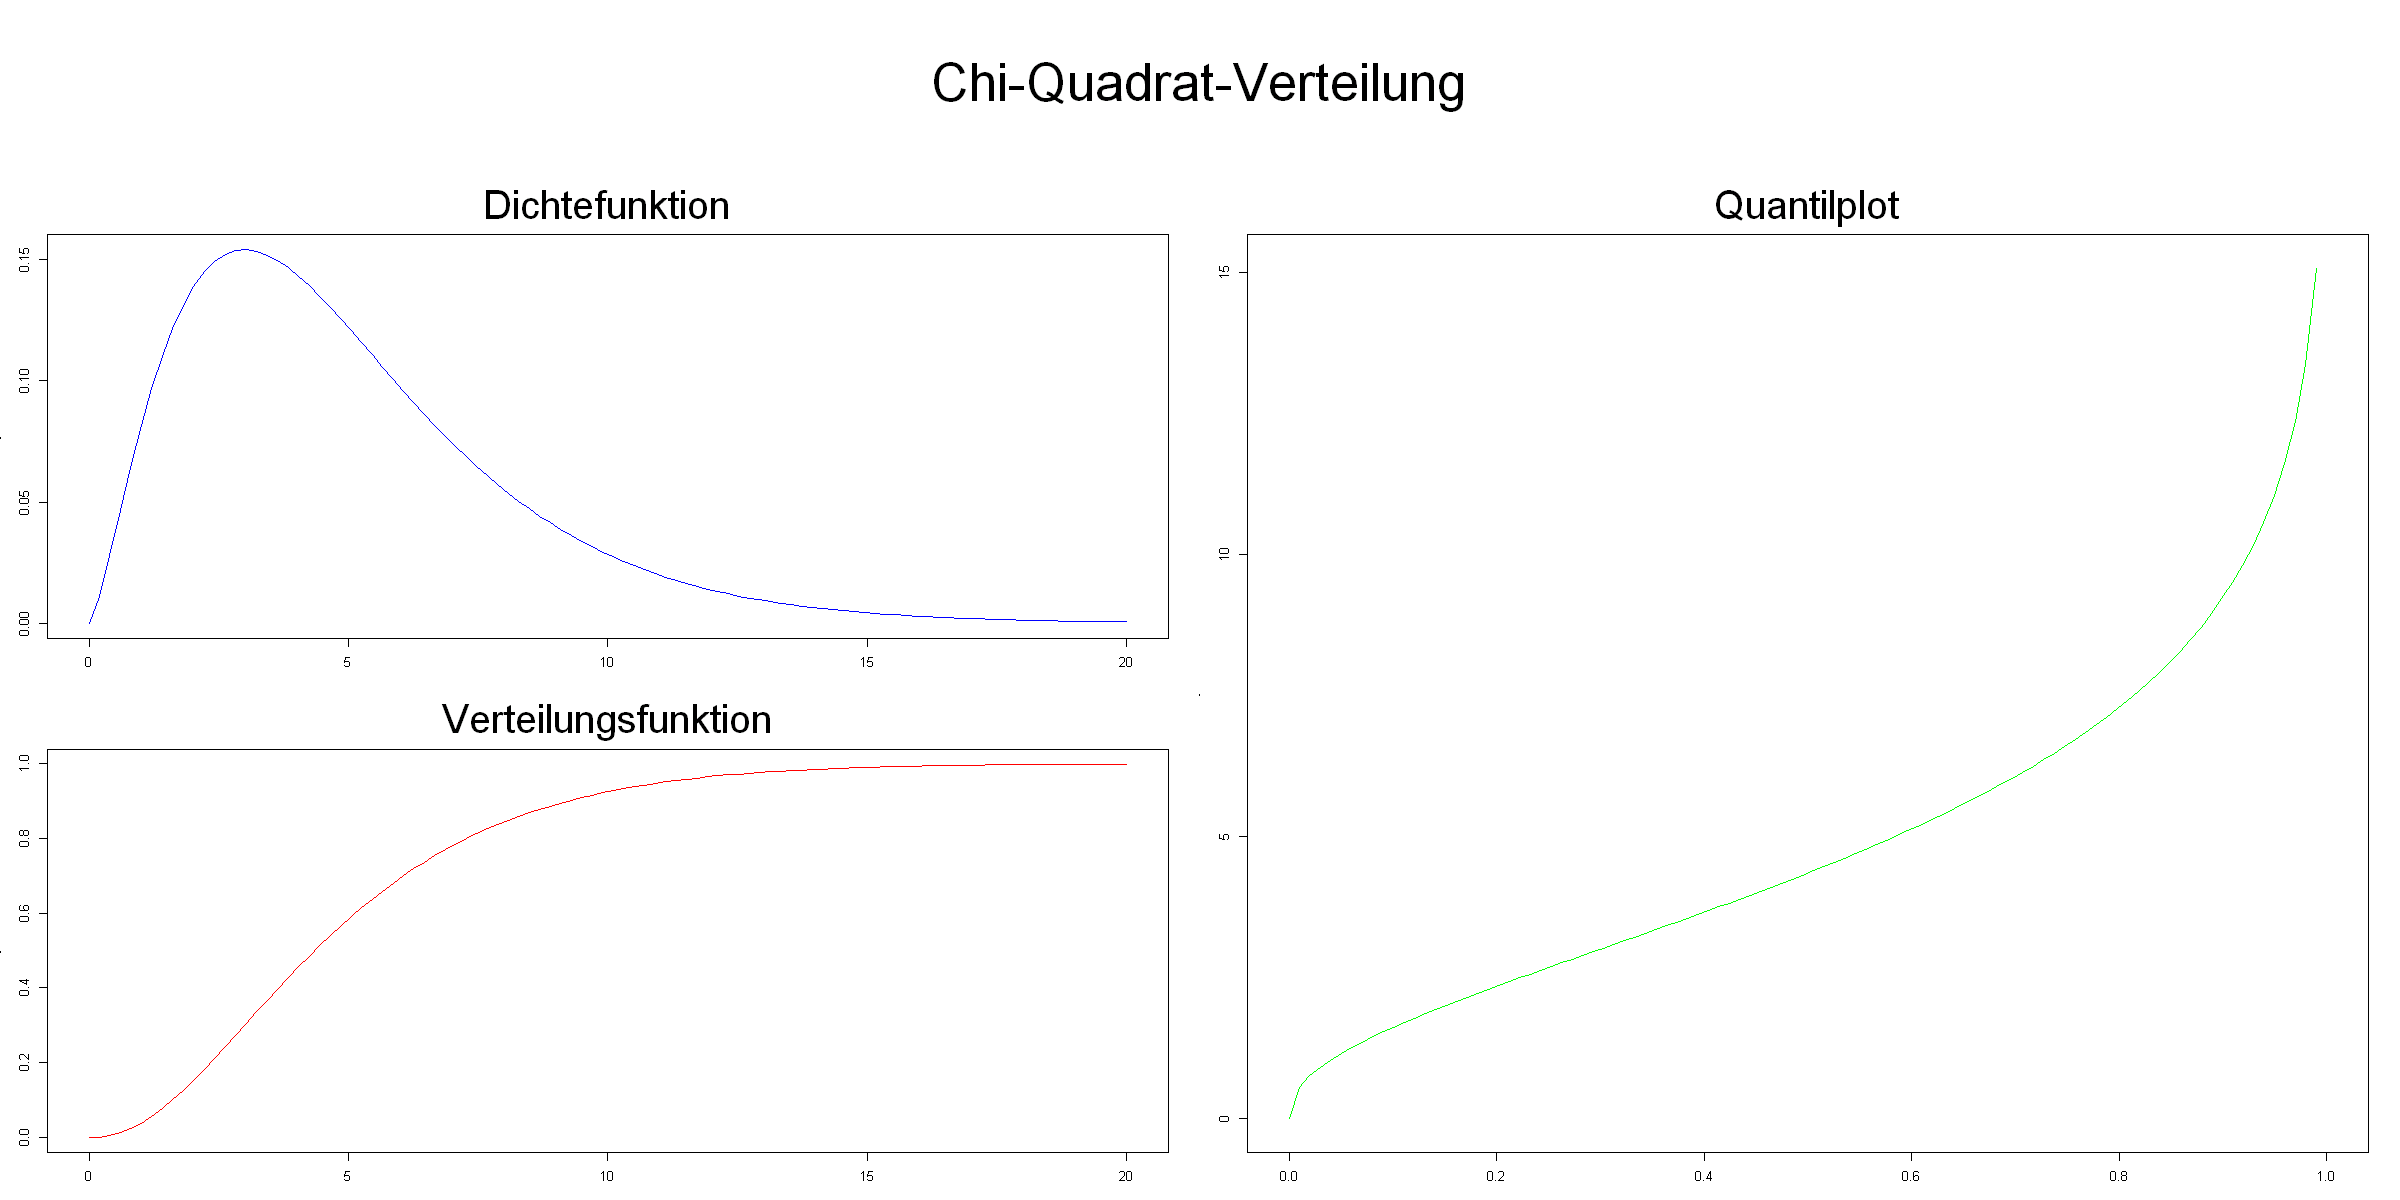

In [13]:
x <- seq(0, 20, length=100)
df <- 5
pdf <- dchisq(x, df)
cdf <- pchisq(x, df)

p <- seq(0, 1, length=100)
quantiles <- qchisq(p, df)

value <- quantilplot("Chi-Quadrat-Verteilung", x, pdf, cdf, p, quantiles)

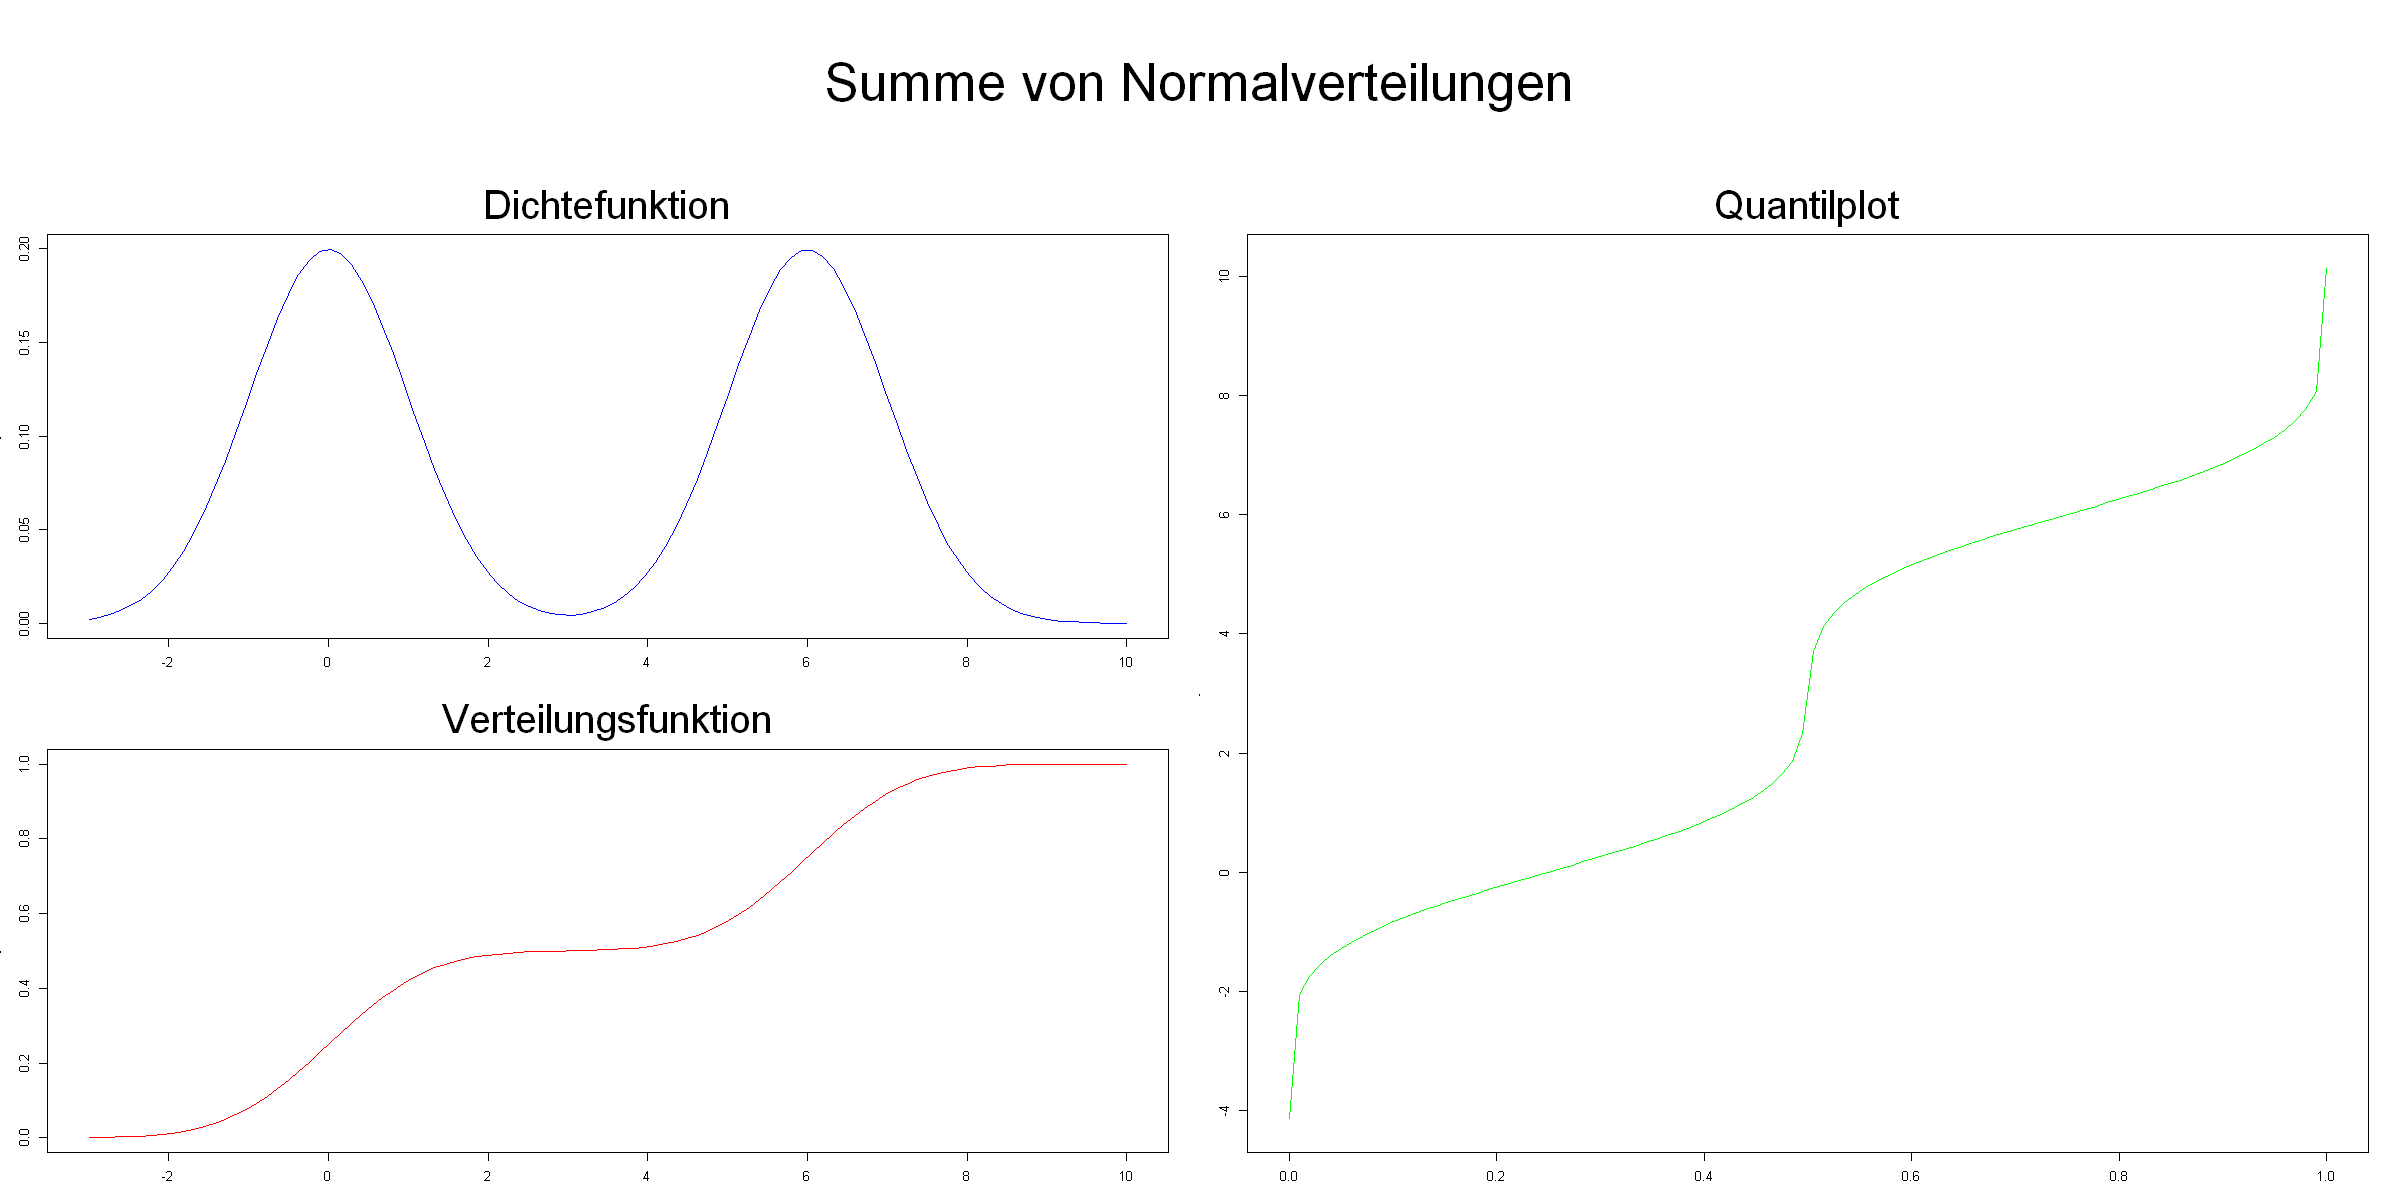

In [22]:
mu1 <- 0
sigma1 <- 1
mu2 <- 6
sigma2 <- 1

a <- 0.5
b <- 0.5

mu_z <- a * mu1 + b * mu2
sigma_z <- sqrt(a^2 * sigma1^2 + b^2 * sigma2^2)

x <- seq(-3, 10, length=100)
pdf <- a * dnorm(x, mean = mu1, sd = sigma1) + b * dnorm(x, mean = mu2, sd = sigma2)
cdf <- a * pnorm(x, mean = mu1, sd = sigma1) + b * pnorm(x, mean = mu2, sd = sigma2)

# Number of samples to simulate
n <- 100000

# Simulate data from the mixture distribution
set.seed(123)  # For reproducibility
component1 <- rnorm(n, mean = mu1, sd = sigma1)
component2 <- rnorm(n, mean = mu2, sd = sigma2)
mixture_data <- ifelse(runif(n) < 0.5, component1, component2)

p <- seq(0, 1, length=100)
quantiles <- quantile(mixture_data, p)

value <- quantilplot("Summe von Normalverteilungen", x, pdf, cdf, p, quantiles)